# **Big mart sale prediction using Gradient Boosting and Decision Tree**

# **Importing Library and dataset loading**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
# checking the first 5 rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# checking the last 5 rows of the dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# **Exploratory Data Analysis (EDA)**

In [5]:
# checking the shape of the dataset
df.shape

(8523, 12)

**There are 8523 rows and 12 columns in our dataset**

In [6]:
# checking the columns of the dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# data type of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**There are 4 columns with float data type and 1 integer data type and 7 object data type columns present in our data**

In [9]:
# checking the number of missing values in each column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

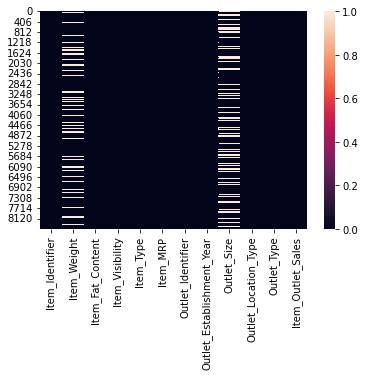

In [10]:
# plot the missing values in each column
sns.heatmap(df.isnull())

In [12]:
# description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


<AxesSubplot:>

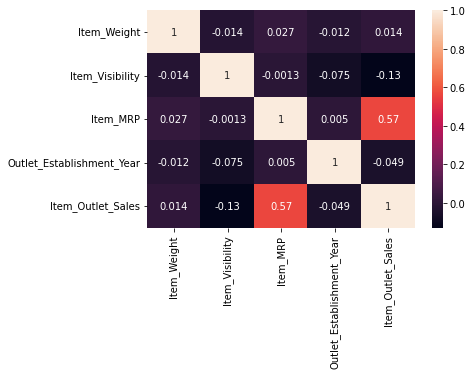

In [13]:
# heat map of the data set 
sns.heatmap(df.corr(),annot=True)

In [14]:
# correlatoin of the dataset
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [15]:
# checking the number of unique values in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

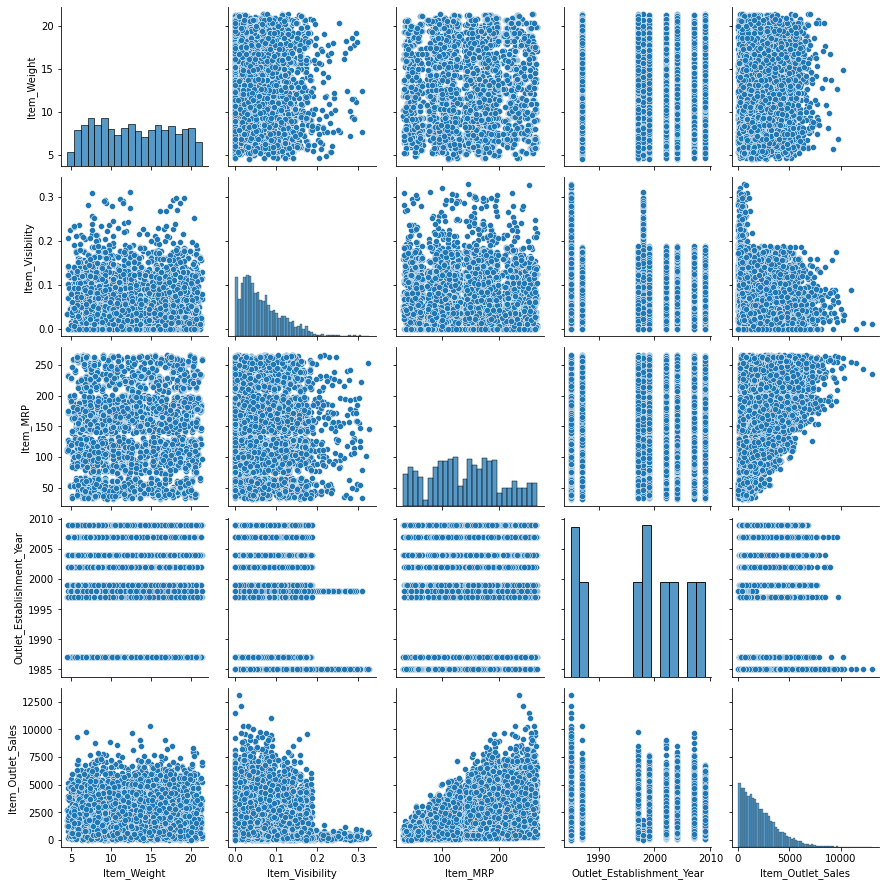

In [16]:
# plot the pairplot of the dataset
sns.pairplot(df)

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

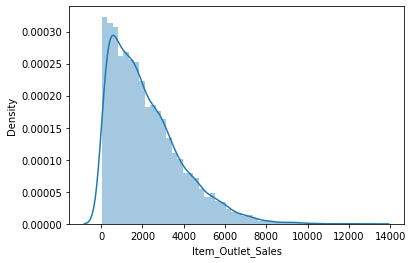

In [18]:
# plot the distribution plot of the dataset
sns.distplot(df['Item_Outlet_Sales'])

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

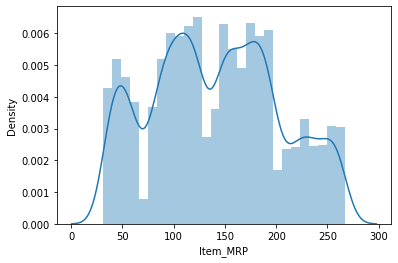

In [19]:
# distributin   plot of the dataset
sns.distplot(df['Item_MRP'])

In [24]:
# value counts of the product  identifier collumn
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDD38     9
NCF42     9
DRN47     9
         ..
FDN52     1
FDK57     1
FDO33     1
DRF48     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [25]:
# value counts of the outlet identifier collumn
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# **Data Preprocessing**

In [20]:
# column names of the dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
# printing the data type of the columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
# data head
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
# checking the  misssing values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
# impute the msising values with the mean of the column
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True) 
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [28]:
# use label encoder to convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

<AxesSubplot:>

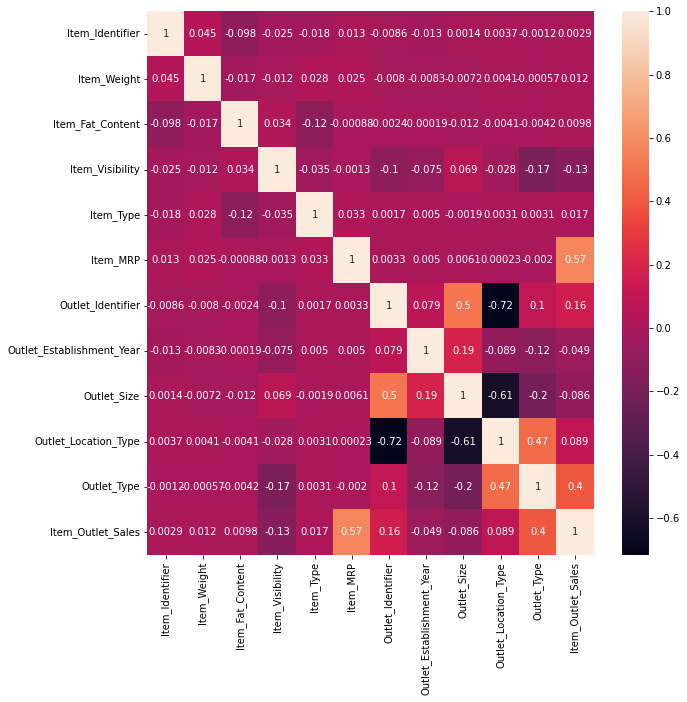

In [60]:
# plot the heatmap of the dataset with plot size 10,10
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

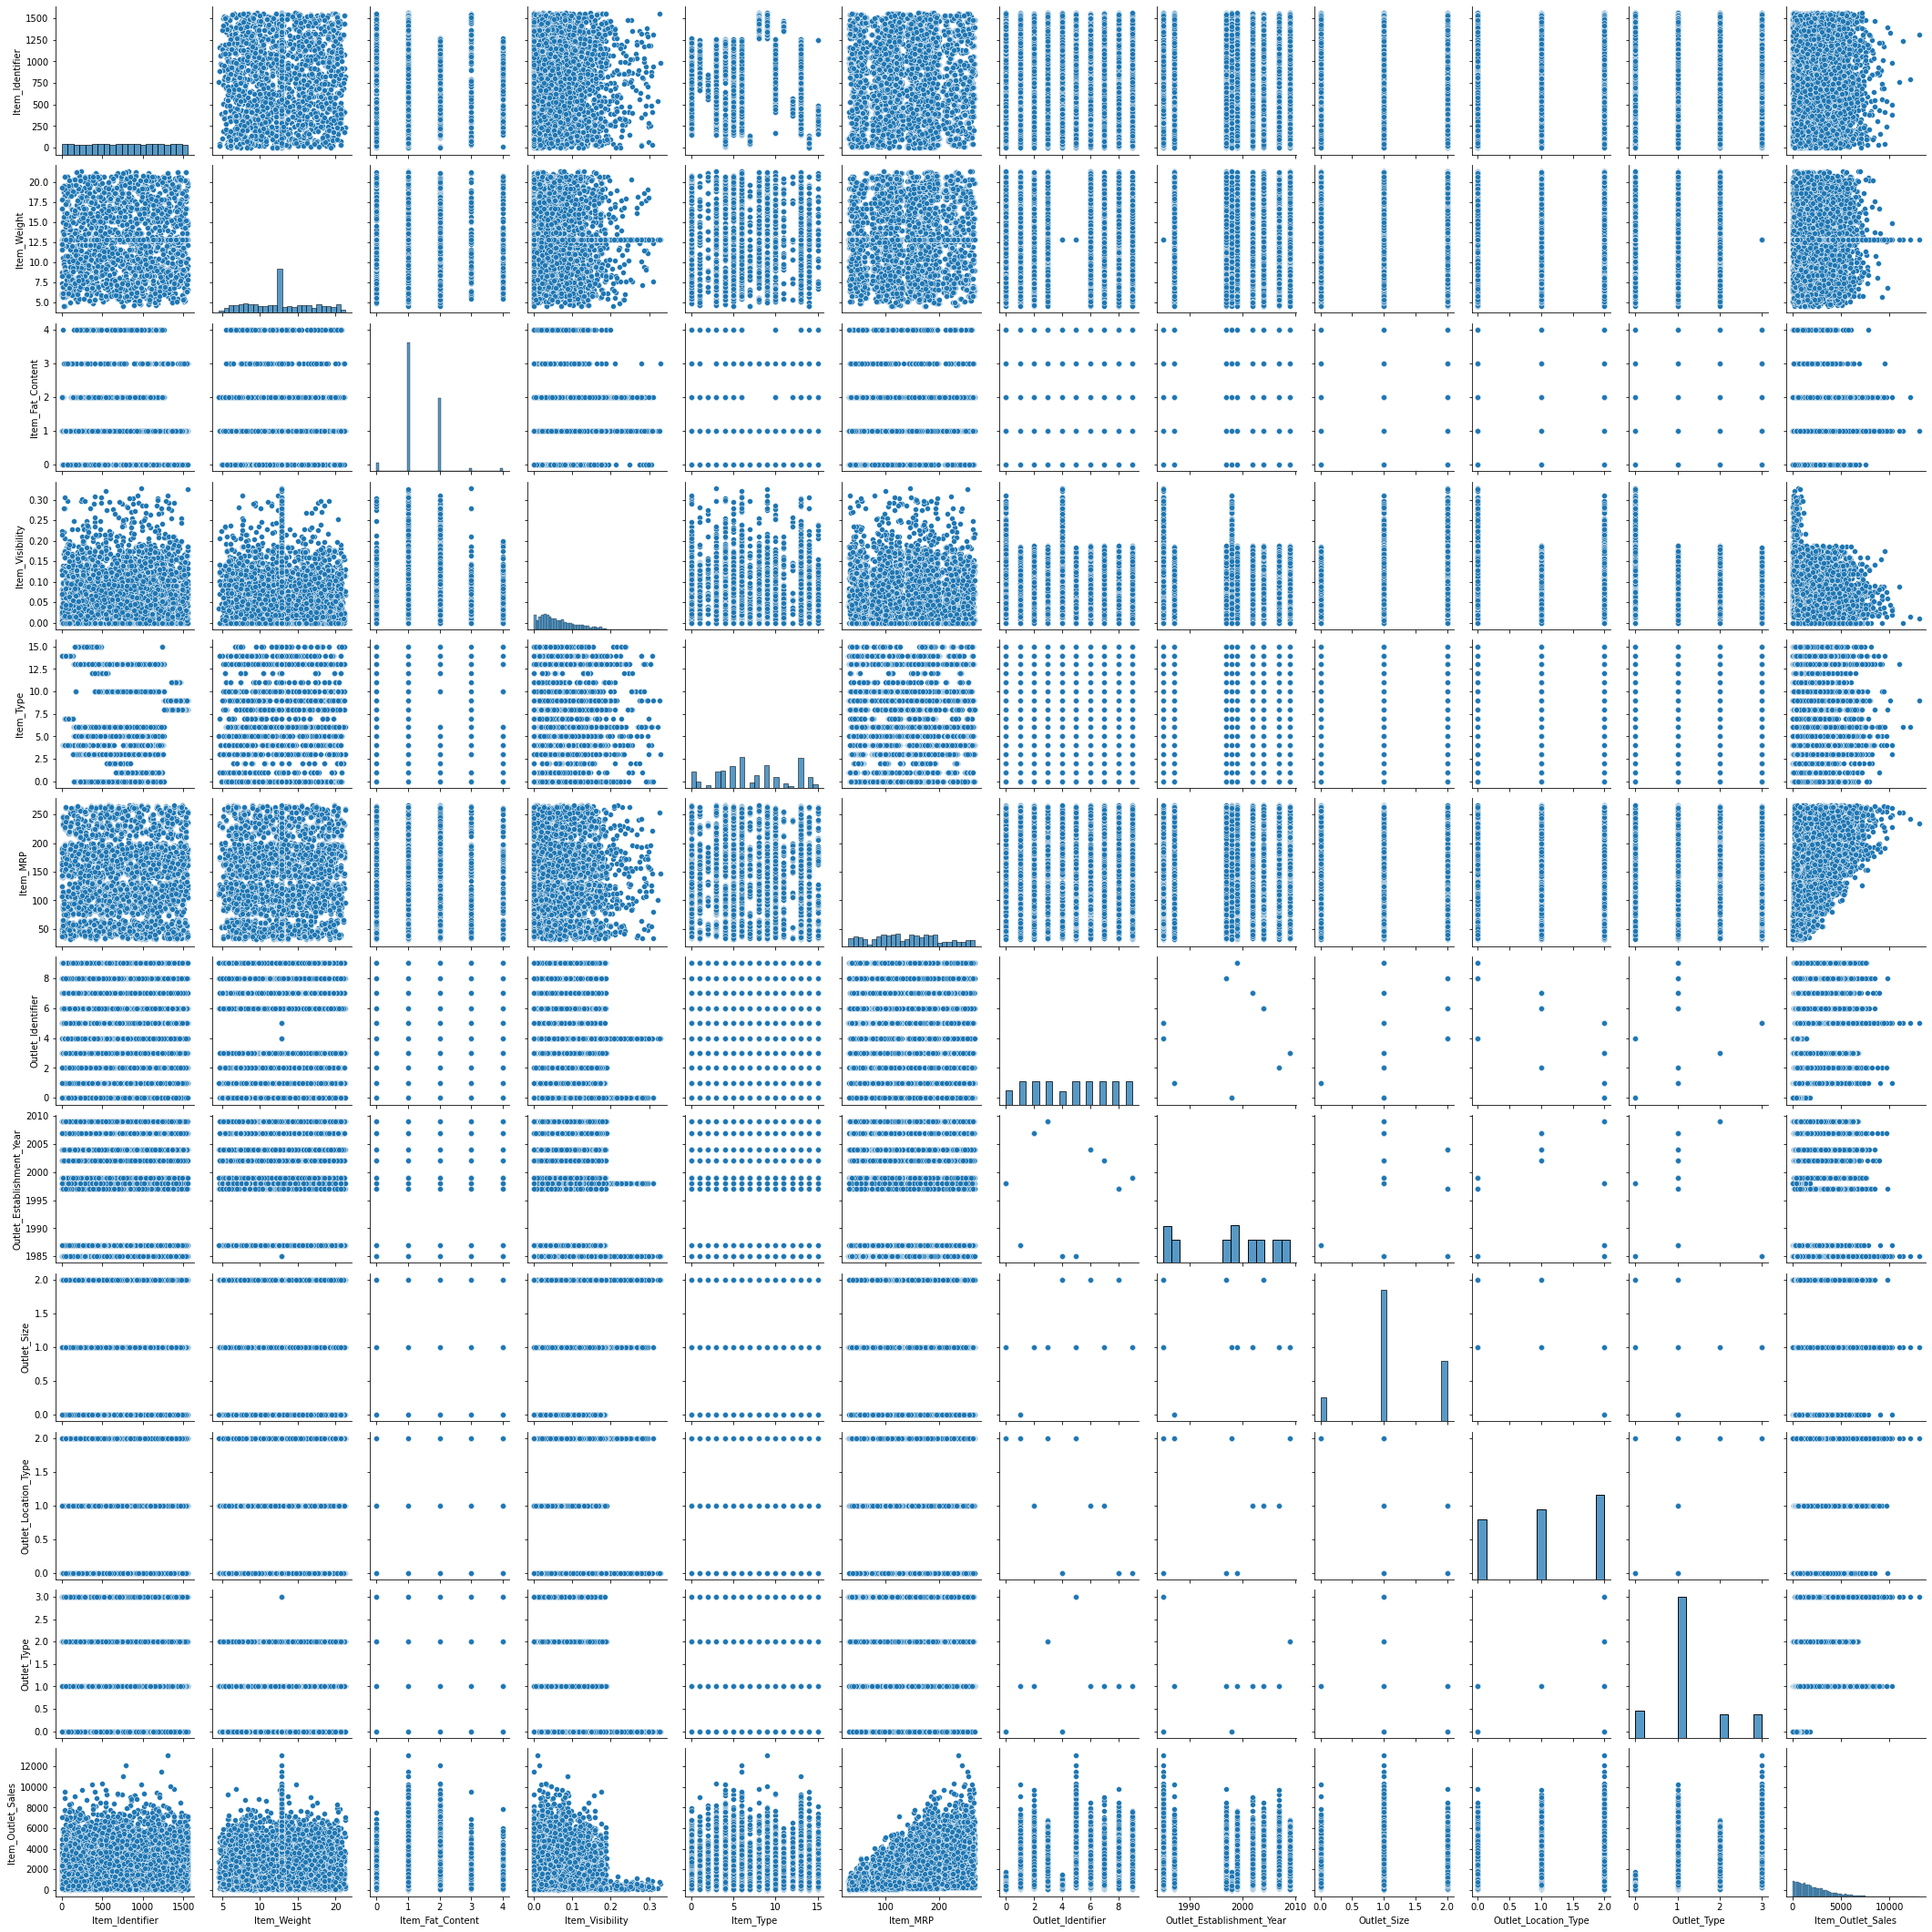

In [61]:
# plot the pairplot of the dataset
sns.pairplot(df)

In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
# split the dataset into x and y
x = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [32]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,657,7.720000,2,0.147904,6,116.6466,0,1998,1,2,0
655,1360,19.750000,1,0.014301,9,103.0332,8,1997,2,0,1
2229,1204,12.857645,2,0.054221,1,129.1310,5,1985,1,2,3
2537,680,19.350000,1,0.118342,13,222.6088,7,2002,1,1,1
3528,1180,18.350000,2,0.092150,5,184.8266,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,1172,9.395000,2,0.286345,6,139.1838,0,1998,1,2,0
5191,263,15.600000,1,0.117575,5,75.6670,2,2007,1,1,1
5390,1464,17.600000,1,0.018944,8,237.3590,7,2002,1,1,1
860,609,20.350000,3,0.054363,13,117.9466,2,2007,1,1,1


In [46]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

# **Model Building**

## **Gradient Boosting Regressor**

In [33]:
# Bilding the gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
# predicting the model
y_pred = gb.predict(x_test)
# evaluating the model
from sklearn.metrics import r2_score
gb_acc = r2_score(y_test,y_pred)
print(gb_acc)

0.5956254757675407


In [34]:
# calculating the evaluation errors 
from sklearn.metrics import mean_squared_error
gb_mse = mean_squared_error(y_test,y_pred)
gb_rmse = np.sqrt(gb_mse)
print(gb_rmse)

1064.2605061755216


In [35]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
gb_mae = mean_absolute_error(y_test,y_pred)
print(gb_mae)

741.1932868302039


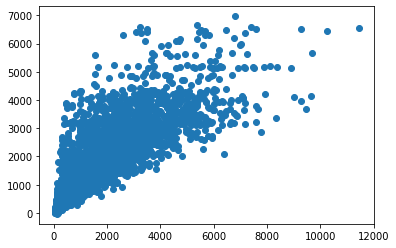

In [36]:
# plot the actual and predicted values
plt.scatter(y_test,y_pred)

## **Decision Tree Regressor**

In [55]:
# Building the decision treee regressor
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor()
dt1.fit(x_train,y_train)
# predicting the model
y_pred = dt1.predict(x_test)
# evaluating the model
from sklearn.metrics import r2_score
dt_acc = r2_score(y_test,y_pred)
print(dt_acc)

0.18596181141358448


In [50]:
# decision tree regressor with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor()
param = {'max_depth':np.arange(2,15)}
dt_cv = GridSearchCV(dt,param,cv=5)
dt_cv.fit(x_train,y_train)
# predicting the model
y_pred = dt_cv.predict(x_test)
# evaluating the model
from sklearn.metrics import r2_score
dt_acc = r2_score(y_test,y_pred)
print(dt_acc)

0.5972795413926701


In [51]:
# calculating the evaluation errors
from sklearn.metrics import mean_squared_error
dt_mse = mean_squared_error(y_test,y_pred)
dt_rmse = np.sqrt(dt_mse)
print(dt_rmse)

1062.081634289549


In [52]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
dt_mae = mean_absolute_error(y_test,y_pred)
print(dt_mae)

743.1142222171443


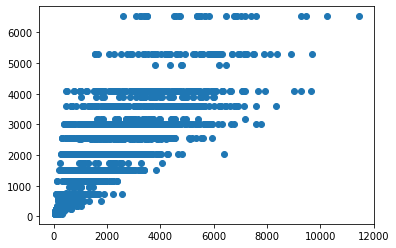

In [53]:
# plot the actual and predicted values
plt.scatter(y_test,y_pred)

In [57]:
abc = [[1360,	19.750000,	1,	0.014301,	9,	103.0332,	8,	1997,	2	,0,	1]]
result = dt1.predict(abc)
print(result)

[1230.3984]


In [58]:
# save the model
import pickle
pickle.dump(dt1,open('Decision Tree.pkl','wb'))

# **Model comparison**

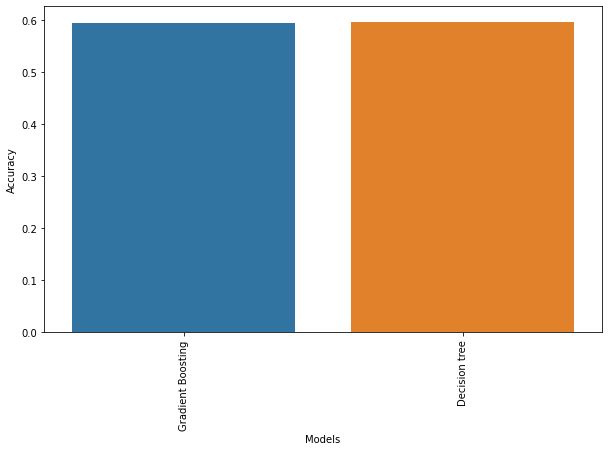

In [44]:
graph = pd.DataFrame({'Models':['Gradient Boosting','Decision tree'],'Accuracy':[gb_acc,dt_acc],'RMSE':[gb_rmse,dt_rmse],'MAE':[gb_mae,dt_mae]})
graph


plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()